<a href="https://colab.research.google.com/github/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/01_capstone_larger_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Larger datasets capstone for section 01 -- putting together what we have learned so far.
### We will be using the Medical Cost Personal Dataset. We will try to predict the individual medical costs billed by health insurance.
### https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [3]:
## Libraries import
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read in the insurance dataset listed above from github
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance
# since we are working with trying to predict a number from other numbers,
# we will be using regression analysis.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## We need a dependent variable(outcome) and indepent variables(features) identified
## The dependent variable will be charges(what we are trying to predict)
## The independent features will be the rest of the columnar data categories, seen above: age, sex, bmi, children, smoker, region. These will be transformed into numerical values that we will use for our neural network.

In [5]:
# Let's one-hot encode our DataFrame to convert string based categories to
# numbers first, so we can create a neural network regression model by th use
# of Pandas get_dummies function, basically one-hot encoding.

In [6]:
insurance_one_hot = pd.get_dummies(insurance) # let's save as a variable
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
# Create X & y values for model creation (neural network) training and test sets
# Create X -- feature set

In [8]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
# view y -- aka label vector
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
# Excellent, we have isolated charges as the dependent variable
# Create the training and test sets --  we can use scikitlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [11]:
# Create/build neural network akin to model_2 from 01 notebook
tf.random.set_seed(42)
charges_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ], name="charges_model_1")
# compile model
charges_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# fit the model
charges_model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8707.8398 - mae: 8707.8398
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7851.4521 - mae: 7851.4521
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.7715 - mae: 7613.7715
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7532.0815 - mae: 7532.0815
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7726.1328 - mae: 7726.1328
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.4312 - mae: 7644.4312
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7556.7388 - mae: 7556.7388
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7740.7222 - mae: 7740.7222
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7554.5283 - mae: 7554.5283
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7696.4897 - mae: 7696.4897

In [12]:
charges_model_1.summary()

Model: "charges_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 10)             120       
                                                                 
 dense_1 (Dense)             (None, 1, 1)              11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
charges_model_1.evaluate(X_test, y_test ) # wrong by 7108 approx on average

9/9 [==============================] - 0s 2ms/step - loss: 7108.3599 - mae: 7108.3599


[7108.35986328125, 7108.35986328125]

In [19]:
y_train.median(), y_train.mean() # substantially incorrect

(9575.4421, 13346.089736364485)

In [15]:
# We need to improve our model for a better result -- experiment!

In [23]:
# lets create a new model with improvements as we have done before
# we will add more layers and increase Density of hideden layers & epochs
# and use Adam as the optimizer
tf.random.set_seed(42)
charges_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

charges_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
training_history = charges_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13247.8838 - mae: 13247.8838
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13010.3096 - mae: 13010.3096
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12539.7852 - mae: 12539.7852
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11686.1797 - mae: 11686.1797
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10402.1006 - mae: 10402.1006
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 8949.1855 - mae: 8949.1855
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7829.1040 - mae: 7829.1040
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7476.1426 - mae: 7476.1426
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7427.1782 - mae: 7427.1782
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7407.5396 - mae:

In [25]:
charges_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3480.0227 - mae: 3480.0227


[3480.022705078125, 3480.022705078125]

In [21]:
# WOW, we cut it in approx. half! Let's check our training history and see

Text(0.5, 0, 'epochs')

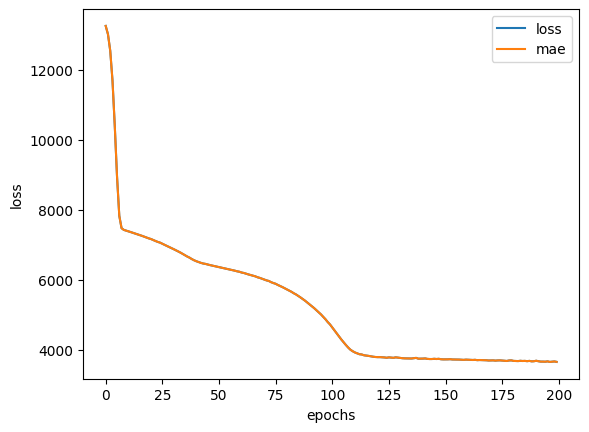

In [28]:
# Plot history aka training curve or loss curve
pd.DataFrame(training_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# This is a good sign! We see the curve on a steep decline. So we see that if we
# train longer, we may get closer to more accuracy. So that begs the ?
# How long to train for?
# Answer: it depends. lol There is no immutable answer. But... maybe there is...
# EarlyStopping Callback :-) TensorFlow component that stops the model training
# epochs once it stops improving a certain metric. We will explore later on!